## 3 second features

#### Import important modules 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('data/features_3_sec.csv')
df = df.set_index('filename')
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock


In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [6]:
print(df.shape)

(9990, 59)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9990 entries, blues.00000.0.wav to rock.00099.9.wav
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  h

In [8]:
feats = df.columns.values.tolist()
print(feats)

['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [9]:
print("Are there are any missing values?", 'Yes' if df.isnull().values.any() else 'No')
unique = df.nunique(axis=0)
total_null = df.isnull().sum()
print("Features with missing values", df.columns[df.isnull().any()].tolist())
percentage = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
out = pd.concat([total_null,percentage, unique],axis=1, keys=["unique","total_null","percentage"])
out

Are there are any missing values? No
Features with missing values []


,unique,total_null,percentage
length,0,0.0,1
chroma_stft_mean,0,0.0,9845
chroma_stft_var,0,0.0,9831
rms_mean,0,0.0,9846
rms_var,0,0.0,9846
spectral_centroid_mean,0,0.0,9847
spectral_centroid_var,0,0.0,9847
spectral_bandwidth_mean,0,0.0,9847
spectral_bandwidth_var,0,0.0,9847
rolloff_mean,0,0.0,9181


## Correlation Heatmap for all feature

In [10]:
# length is not an informative feature so we just drop it
X = df.drop(columns=['label', 'length'])
y = df['label']

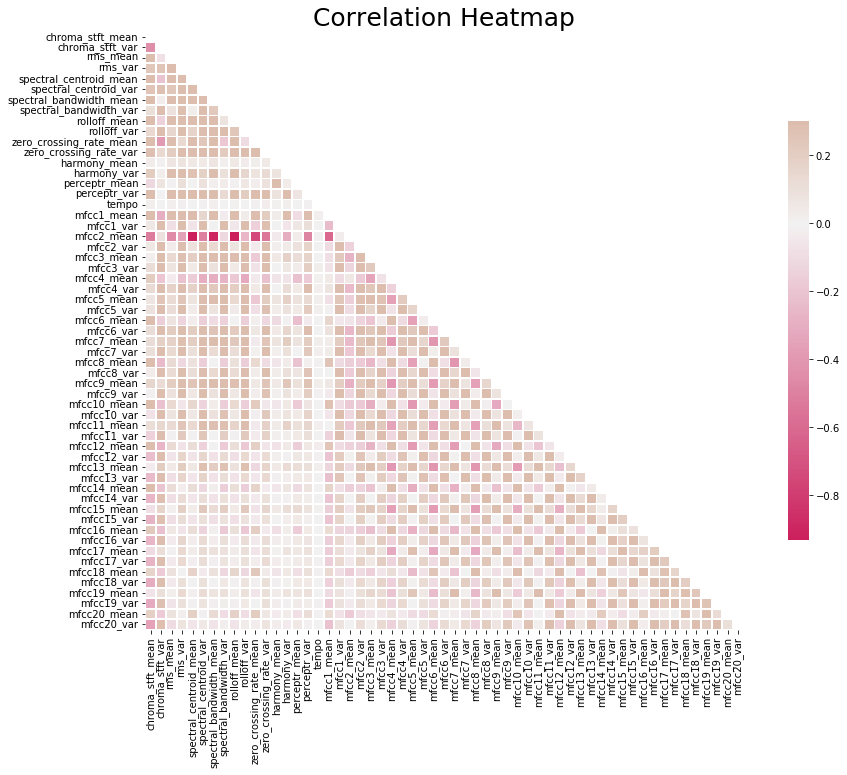

In [11]:
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})

plt.title('Correlation Heatmap', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

Most of the variables do not have a high correlation with other variables. Let's filter out the extremely highly correlated pairs and examine them.

In [12]:
# print highly correlated features
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
for index, value in sol.items():
    if abs(value) > 0.75:
        print(index, value)

('spectral_centroid_mean', 'rolloff_mean') 0.9743599625424502
('spectral_bandwidth_mean', 'rolloff_mean') 0.9510001983017642
('spectral_bandwidth_var', 'rolloff_var') 0.8913391590779051
('spectral_centroid_mean', 'spectral_bandwidth_mean') 0.8903820862571342
('rms_mean', 'harmony_var') 0.8848462375484575
('spectral_centroid_mean', 'zero_crossing_rate_mean') 0.8654866435613563
('spectral_centroid_var', 'zero_crossing_rate_var') 0.8183483105102972
('rms_mean', 'mfcc1_mean') 0.7949996654920132
('spectral_centroid_var', 'rolloff_var') 0.7803079607634971
('mfcc6_mean', 'mfcc8_mean') 0.7692476543269194
('rms_mean', 'perceptr_var') 0.7664460670833436
('rolloff_mean', 'zero_crossing_rate_mean') 0.7554419563187708
('spectral_bandwidth_mean', 'mfcc2_mean') -0.8871556361374734
('rolloff_mean', 'mfcc2_mean') -0.9236517584142989
('spectral_centroid_mean', 'mfcc2_mean') -0.9314352888991452


In [13]:
# select upper triangle of the corr matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# find feature columns with abs(correlation) >= 0.8
to_drop = [c for c in upper.columns if any(upper[c] >= 0.8)]
to_drop

['spectral_bandwidth_mean',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_var']

In [14]:
X = X.drop(columns=to_drop)

In [15]:
X.shape

(9990, 51)

## Box Plot for Genres Distributions

**Visualize the beats per minute by genre**

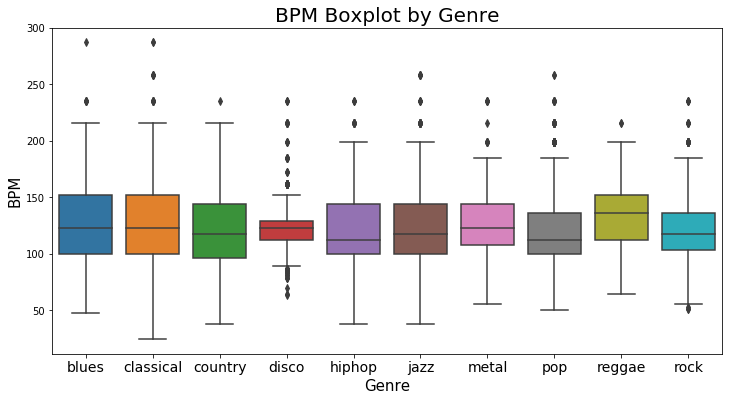

In [16]:
fig, ax = plt.subplots(figsize=(12, 6));
sns.boxplot(x = "label", y = "tempo", data = df[["label", "tempo"]]);

plt.title('BPM Boxplot by Genre', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15);
# plt.savefig("BPM Boxplot.jpg")

## Plot the relationships between the label (Genre) and features (exclude highly correlated features) using a small multiple of box plots.

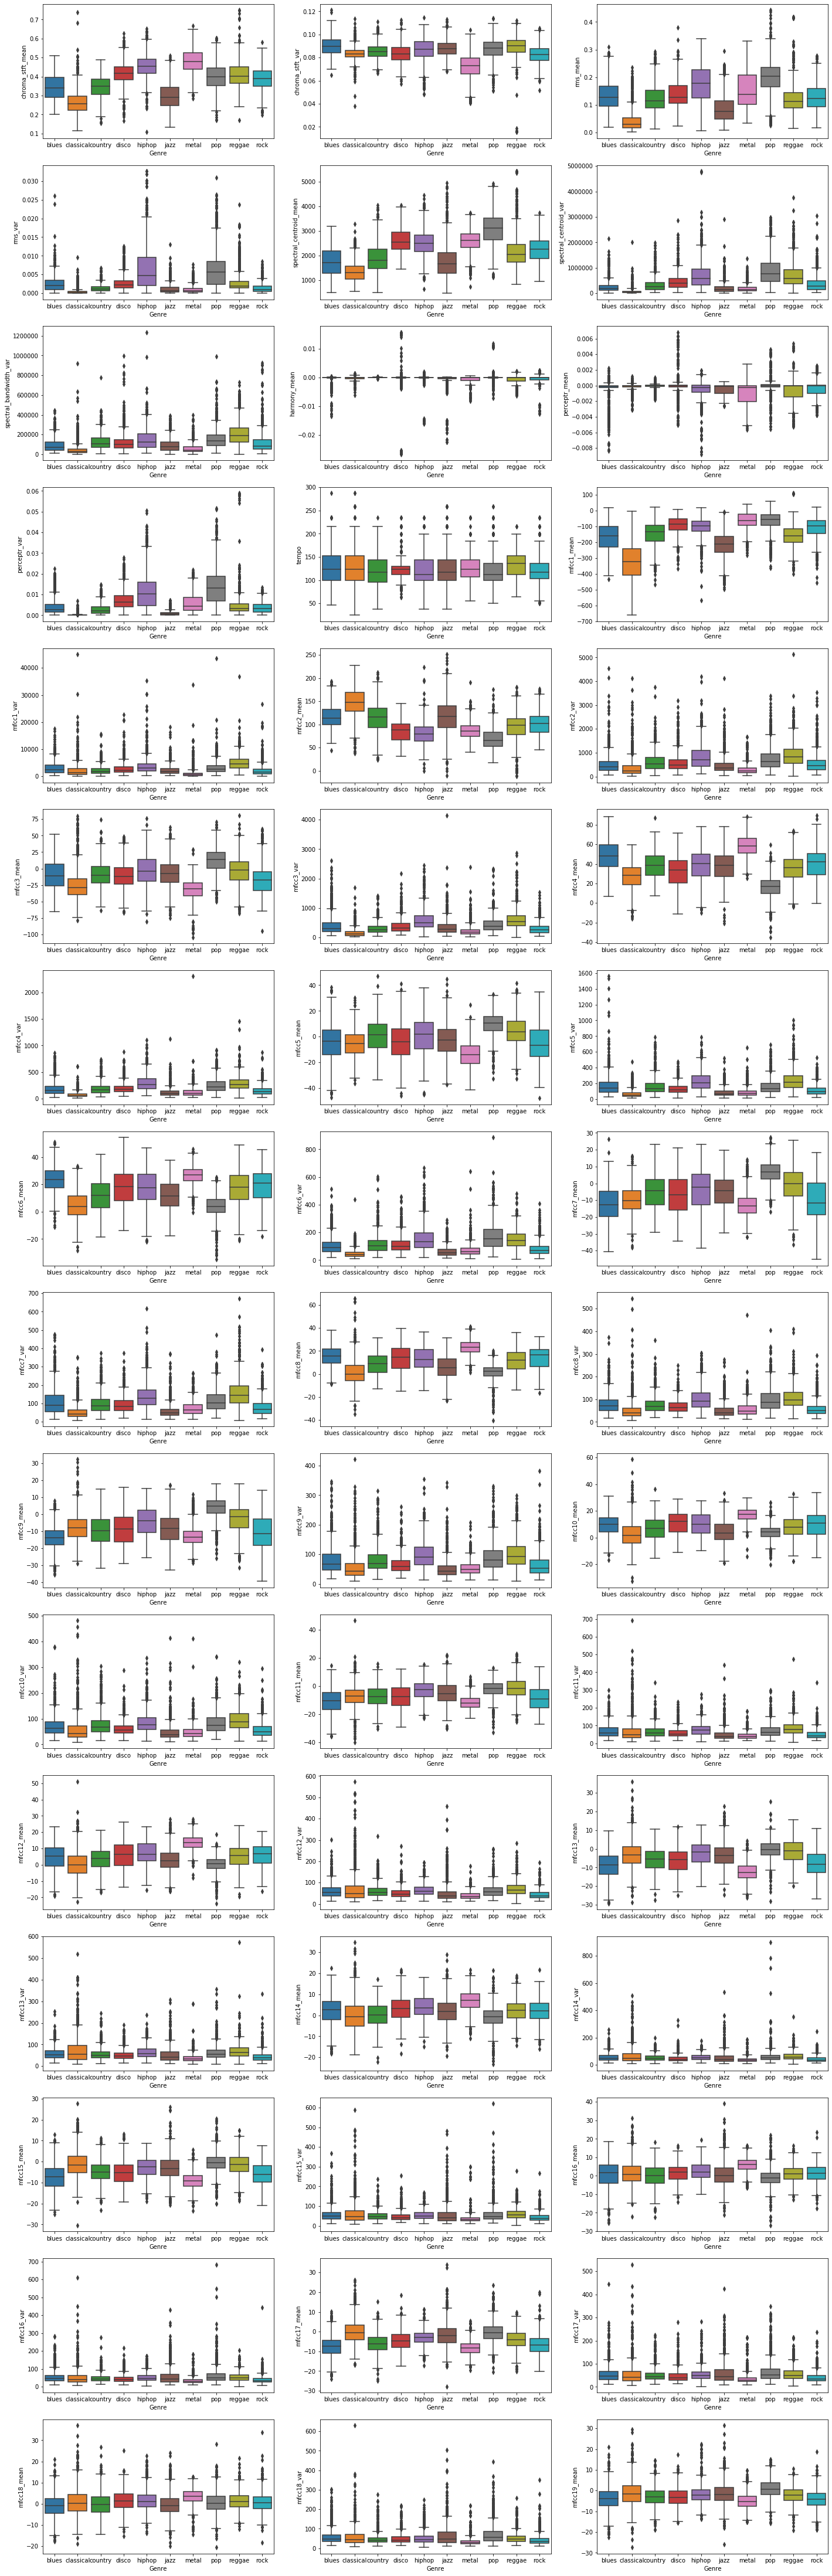

In [17]:
fig, ax = plt.subplots(16,3, figsize=(24,80))

for f, subplot in zip(X.columns, ax.flatten()):
    sns.boxplot(x=y, y=f, data=X, ax=subplot)\
    #.set(title='Boxplot plot of genre vs {}'.format(f))
    subplot.set_xlabel("Genre")

## Plot the histogram of all features (exclude highly correlated features).

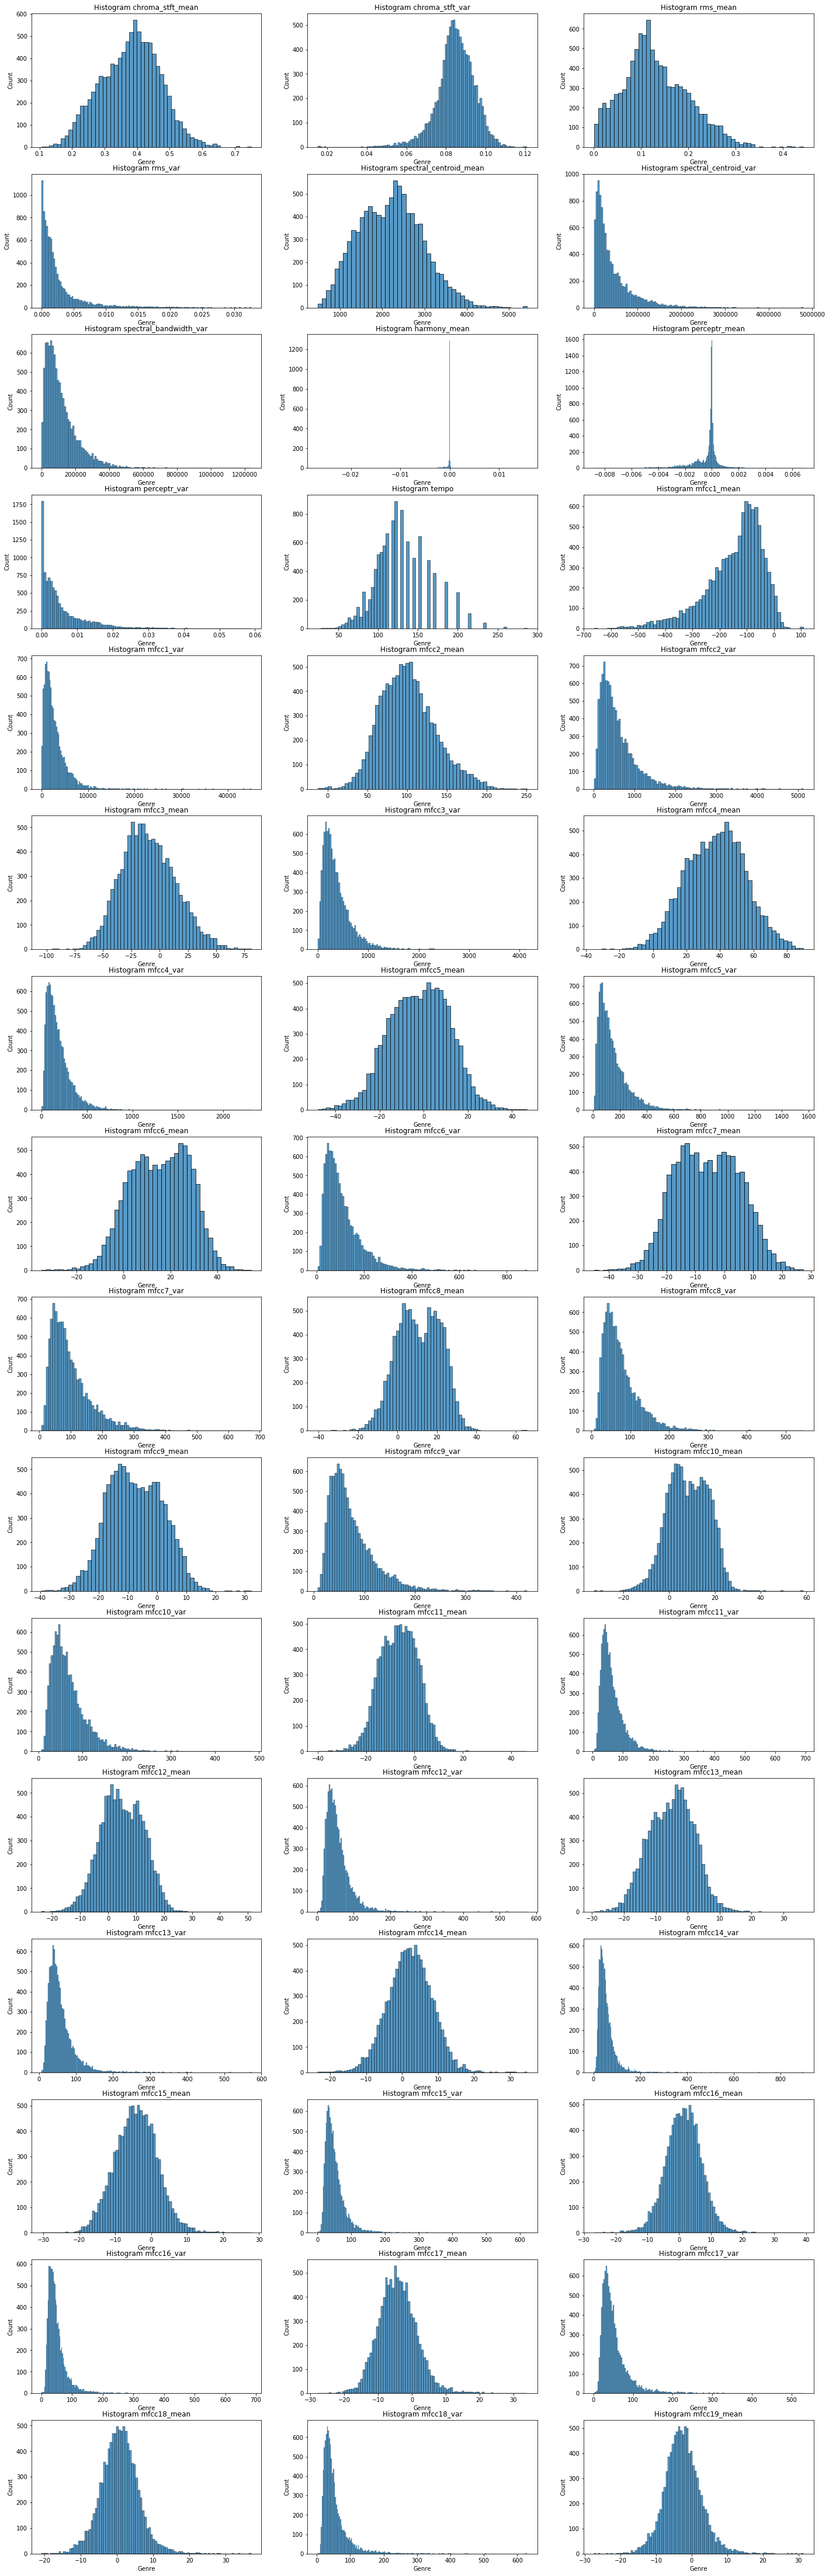

In [21]:
fig, ax = plt.subplots(16,3, figsize=(24,80))


for f, subplot in zip(X.columns, ax.flatten()):
    sns.histplot(x=X[f], ax=subplot)\
    .set(title='Histogram {}'.format(f))
    subplot.set_xlabel("Genre")

# Beginner Model

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from xgboost import XGBClassifier

In [17]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2)

preprocess = make_column_transformer((StandardScaler(), X_dev.columns))
pipe = make_pipeline(preprocess)

pipe.fit(X_dev)
X_dev = pipe.transform(X_dev)
X_test = pipe.transform(X_test)

In [18]:
hgb_param_grid = {"max_iter": [100, 200, 300],
                  "learning_rate": np.random.uniform(0.01, 0.3, 3),
                  "max_depth": [4, 6, 8]}
hgb_param_grid

{'max_iter': [100, 200, 300],
 'learning_rate': array([0.0565612 , 0.07907972, 0.16382893]),
 'max_depth': [4, 6, 8]}

In [19]:
%%time
grid_search = GridSearchCV(HistGradientBoostingClassifier(random_state=0), 
                           param_grid = hgb_param_grid, 
                           cv = 5,
                           n_jobs=-1)
grid_search.fit(X_dev, y_dev)
print("Best parameter set is: {}".format(grid_search.best_params_))
best_hgb = grid_search.best_estimator_
best_hgb.fit(X_dev, y_dev)

print('\nClassification Report of tuned HGB on test set')
print(classification_report(y_test, best_hgb.predict(X_test)))

Best parameter set is: {'learning_rate': 0.16382893289303638, 'max_depth': 6, 'max_iter': 300}

Classification Report of tuned HGB on test set
              precision    recall  f1-score   support

       blues       0.92      0.93      0.92       193
   classical       0.94      0.96      0.95       200
     country       0.88      0.87      0.88       194
       disco       0.91      0.94      0.93       203
      hiphop       0.94      0.94      0.94       204
        jazz       0.90      0.95      0.92       198
       metal       0.91      0.95      0.93       190
         pop       0.98      0.90      0.94       201
      reggae       0.91      0.93      0.92       199
        rock       0.89      0.82      0.86       216

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998

CPU times: user 2min 43s, sys: 3.49 s, total: 2min 46s
Wall time: 5min 38s
